In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from time import time
import keras
from keras import layers
from sklearn.svm import SVC

In [42]:
df=pd.DataFrame(pd.read_csv('mnist_train1.csv'))
df2=pd.DataFrame(pd.read_csv('mnist_test1.csv'))

x_train1 = df.drop('label',axis=1) / 255.
y_train = df['label']
x_test1  = df2.drop('label',axis=1) / 255.
y_test  = df2['label']

In [43]:
encoding_dim = 87
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(256, activation='relu')(input_img)
encoded = layers.Dense(100, activation='relu')(encoded)
encoded = layers.Dense(87, activation='relu')(encoded)

decoded = layers.Dense(87, activation='relu')(encoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [44]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(x_train1, x_train1,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test1, x_test1))

Epoch 1/100
235/235 [==============================] - 3s 11ms/step - loss: 0.2164 - val_loss: 0.1427
Epoch 2/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1272 - val_loss: 0.1138
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1097 - val_loss: 0.1038
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.1017 - val_loss: 0.0982
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0969 - val_loss: 0.0938
Epoch 6/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0931 - val_loss: 0.0906
Epoch 7/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0904 - val_loss: 0.0882
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0884 - val_loss: 0.0866
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0866 - val_loss: 0.0857
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.085

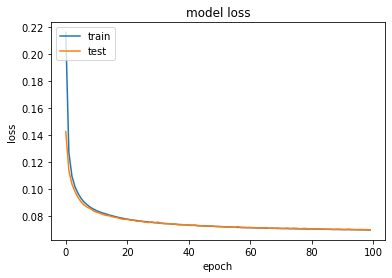

In [45]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))


encoded_imgs = encoder.predict(x_test1)
decoded_imgs = decoder.predict(encoded_imgs)

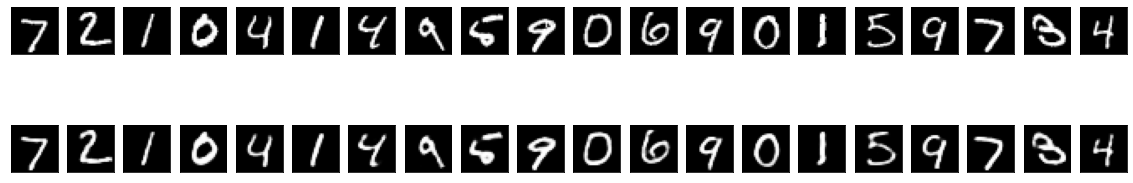

In [47]:
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test1.iloc[i].values.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [48]:
encoded_train_imgs = encoder.predict(x_train1)
encoded_test_imgs = encoder.predict(x_test1)

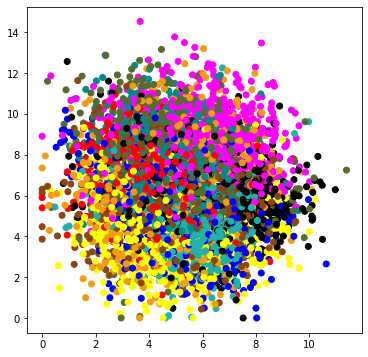

In [49]:
plt.figure(figsize=(6, 6))
colormap = np.array(['red', 'lightseagreen', '#F39C12','magenta', 'yellow', 'black','blue', 'darkolivegreen', 'darkcyan','saddlebrown'])
plt.scatter(encoded_test_imgs[:, 0], encoded_test_imgs[:, 1], c=colormap[y_test.values] )
plt.show()

In [ ]:
df=pd.DataFrame(pd.read_csv('mnist_train1.csv'))
y_train =df['label']%2
df2=pd.DataFrame(pd.read_csv('mnist_test1.csv'))
y_test = df2['label']%2

In [15]:
t0 = time()
model=SVC(C=10, kernel='rbf',degree=1, gamma=0.015)
model.fit(encoded_train_imgs,y_train)
print("Training with SVC done in %0.3fs" % (time() - t0))
print(len(model.support_vectors_))

Training with SVC done in 268.855s
11902


In [16]:
predictions_train=model.predict(encoded_train_imgs)
predictions_test=model.predict(encoded_test_imgs)
print(predictions_test[0],y_test[0])


print("The accuracy in training set is {}".format(accuracy_score(predictions_train,y_train))),0
print("The accuracy in testing set is {}".format(accuracy_score(predictions_test,y_test)))
print(confusion_matrix(y_test,predictions_test))
print('\n')
print(classification_report(y_test,predictions_test))

1 1
The accuracy in training set is 1.0
The accuracy in testing set is 0.9892
[[4888   38]
 [  70 5004]]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4926
           1       0.99      0.99      0.99      5074

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [73]:
df=pd.DataFrame(pd.read_csv('mnist_train1.csv'))
df2=pd.DataFrame(pd.read_csv('mnist_test1.csv'))

x_train = df.drop('label',axis=1) / 255.
y_train = df['label']
x_test  = df2.drop('label',axis=1) / 255.
y_test  = df2['label']

In [74]:
t0 = time()
pca=PCA(0.9)
pca.fit(x_train)
x_train=pca.transform(x_train)
x_test1=pca.transform(x_test)
print("PCA transformation done in %0.3fs" % (time() - t0))
print(x_train.shape)

PCA transformation done in 6.272s
(60000, 87)


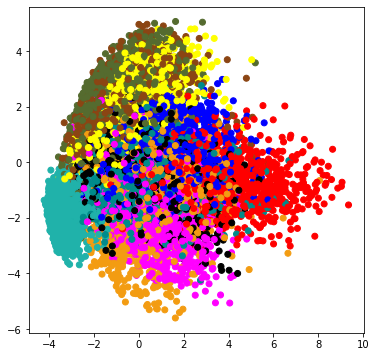

In [76]:
plt.figure(figsize=(6, 6))
colormap = np.array(['red', 'lightseagreen', '#F39C12','magenta', 'yellow', 'black','blue', 'darkolivegreen', 'darkcyan','saddlebrown'])
plt.scatter(x_test1[:, 0], x_test1[:, 1], c=colormap[y_test.values] )
plt.show()

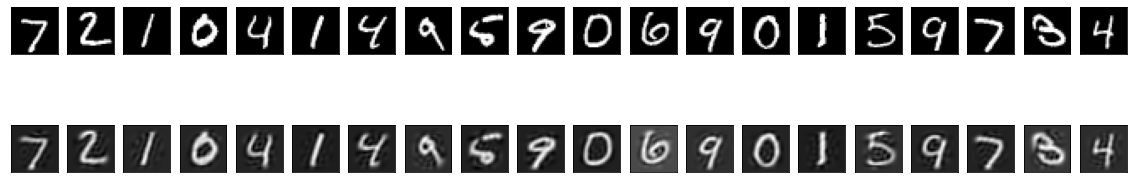

In [78]:
decoded_imgs = pca.inverse_transform(x_test1)
n = 20  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test.iloc[i].values.reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()